## Final Project Submission

Please fill out:
* Student name: Harrison Wang
* Student pace: self paced / part time / full time - Full Time
* Scheduled project review date/time: 
* Instructor name: Matthew Bombard
* Blog post URL: 


# Flatiron Phase 1 Project


## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
They have decided to create a new movie studio, but they don’t know anything about creating movies. 
You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

- What are the most watched genres?
- What are the average ratings of the genres?
- What types of movies resulted in the largest gross sales?

These questions will help Microsoft understand what types of movies to create and how much in gross sales is possible.


In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dbfile = "C:/Users/U8093212/flatiron/phase_1/dsc-phase-1-project-v2-4/zippedData/im.db"
conn = sqlite3.connect(dbfile)
cur = conn.cursor()

In [3]:
basics = pd.read_sql("""
SELECT *
FROM movie_basics
""",conn)

In [4]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
""",conn)

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [8]:
df = pd.merge(ratings,basics,on="movie_id")
df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [10]:
# Since there are missing values in runtime_minutes and given runtime_minutes won't be a main factor in the data questions
# I'll be answering, it makes sense to fill in the runtime_minutes. I will be using the overall average run time to populate
# NaNs. Genre also has a few missing values but it's so small it's worth it to just drop those rows.

In [11]:
df[df["runtime_minutes"].isna()].sample(5, random_state=1)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
26372,tt3313556,8.6,5,Melfi,Melfi,2013,NaN,Drama
35759,tt7009668,6.3,19,Netflix and Chill,Netflix and Chill,2017,NaN,Comedy
42988,tt3158384,5.3,6,Het geheim van Mariënburg,Het geheim van Mariënburg,2013,NaN,Drama
18193,tt5687204,8.0,21,Most of the Souls That Live Here,Most of the Souls That Live Here,2016,NaN,Comedy
28713,tt5889660,5.9,7,Dream Big,Dream Big,2016,NaN,Drama


In [12]:
avg_runtime = df["runtime_minutes"].mean()

In [13]:
df["runtime_minutes"].fillna(avg_runtime,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  73856 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   averagerating    73052 non-null  float64
 2   numvotes         73052 non-null  int64  
 3   primary_title    73052 non-null  object 
 4   original_title   73052 non-null  object 
 5   start_year       73052 non-null  int64  
 6   runtime_minutes  73052 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [17]:
top10list = df.groupby(["genres"])["averagerating"].mean().iloc[:10].sort_values()
top10list

genres
Action,Adult,Comedy             4.650000
Action,Adventure                5.223529
Action,Adventure,Family         5.380000
Action,Adventure,Comedy         5.554032
Action,Adventure,Drama          5.691579
Action,Adventure,Crime          5.755769
Action                          5.757712
Action,Adventure,Animation      6.562874
Action,Adventure,Biography      7.061905
Action,Adventure,Documentary    7.469841
Name: averagerating, dtype: float64

''

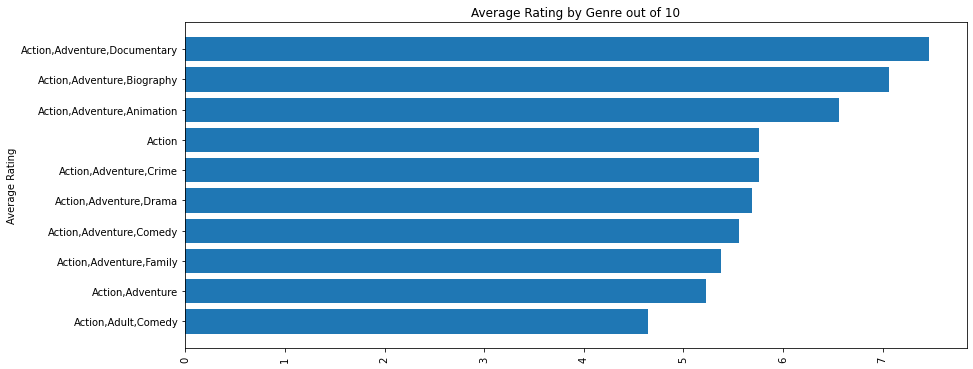

In [18]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot data
ax1.barh(top10list.index, top10list.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Average Rating")
ax1.set_title("Average Rating by Genre out of 10")
;

In [30]:
df.explode("genres")

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.00000,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.00000,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.00000,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.00000,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.00000,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.00000,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.00000,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,94.65404,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.00000,Documentary


In [20]:
# Look at explode function for Genre
# Use split on "," to split genre as multiple variables before using explode function

## Business Recommendation 2

In [21]:
gross_df = pd.read_csv('C:/Users/U8093212/flatiron/phase_1/dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz')

In [22]:
tmdb_df = pd.read_csv('C:/Users/U8093212/flatiron/phase_1/dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv.gz')

In [23]:
moviebud_df = pd.read_csv('C:/Users/U8093212/flatiron/phase_1/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv.gz')

In [24]:
moviebud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [25]:
moviebud_df.rename(columns={"movie":"primary_title"},inplace=True)

In [26]:
df2 = pd.merge(df,moviebud_df,on="primary_title")
df2

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.00000,"Action,Adventure,Fantasy",42,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319"
1,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.00000,"Biography,Drama,Sport",50,"Mar 21, 2008","$850,000","$442,638","$442,638"
2,tt3096900,6.5,13,The Hammer,The Hammer,2015,75.00000,"Action,Adventure,Documentary",50,"Mar 21, 2008","$850,000","$442,638","$442,638"
3,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.00000,Comedy,38,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836"
4,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.00000,"Biography,Drama,Sport",15,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,tt3517850,8.1,11,12 Rounds,12 Rounds,2017,94.65404,"Action,Drama,Romance",37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
2863,tt3591950,5.5,44,Fantasia,Fantasia,2014,86.00000,Drama,69,"Nov 13, 1940","$2,280,000","$83,320,000","$83,320,000"
2864,tt7201846,7.5,705,Edmond,Edmond,2018,110.00000,"Comedy,Drama,History",17,"Jul 14, 2006","$10,000,000","$131,719","$241,719"
2865,tt8043306,7.4,2724,Teefa in Trouble,Teefa in Trouble,2018,155.00000,"Action,Comedy,Crime",8,"Jul 20, 2018","$1,500,000",$0,"$98,806"


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2866
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2867 non-null   object 
 1   averagerating      2867 non-null   float64
 2   numvotes           2867 non-null   int64  
 3   primary_title      2867 non-null   object 
 4   original_title     2867 non-null   object 
 5   start_year         2867 non-null   int64  
 6   runtime_minutes    2867 non-null   float64
 7   genres             2867 non-null   object 
 8   id                 2867 non-null   int64  
 9   release_date       2867 non-null   object 
 10  production_budget  2867 non-null   object 
 11  domestic_gross     2867 non-null   object 
 12  worldwide_gross    2867 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 313.6+ KB


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2866
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2867 non-null   object 
 1   averagerating      2867 non-null   float64
 2   numvotes           2867 non-null   int64  
 3   primary_title      2867 non-null   object 
 4   original_title     2867 non-null   object 
 5   start_year         2867 non-null   int64  
 6   runtime_minutes    2867 non-null   float64
 7   genres             2867 non-null   object 
 8   id                 2867 non-null   int64  
 9   release_date       2867 non-null   object 
 10  production_budget  2867 non-null   object 
 11  domestic_gross     2867 non-null   object 
 12  worldwide_gross    2867 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 313.6+ KB


DataError: No numeric types to aggregate

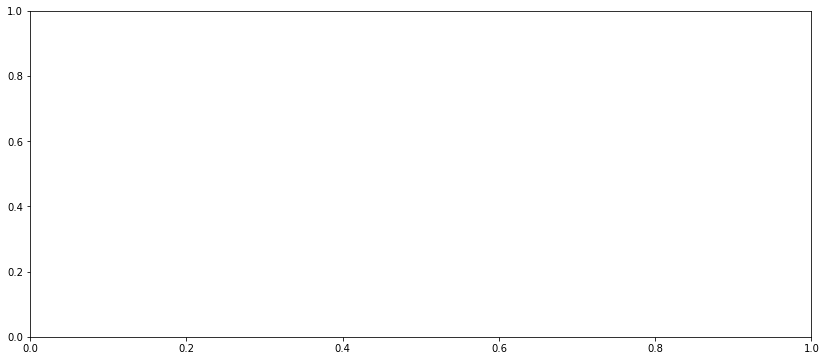

In [29]:
fig, ax3 = plt.subplots(figsize=(14, 6))

# Create variables for easier reuse
top10runtime = df2.groupby(["runtime_minutes"])["domestic_gross"].mean().sort_values(ascending=False).iloc[:20]

# Plot data
ax3.bar(top10runtime.index, top10runtime.values)

# Customize appearance
ax3.tick_params(axis="x", labelrotation=90)
ax3.set_ylabel("Gross Sales ")
ax3.set_title("Gross Sales Performance against Run Time");


## Business Recommendation 3

In [ ]:
fig, ax2 = plt.subplots(figsize=(14,6))
sns.set_theme(style="whitegrid")

# Create variables for easier reuse
top_10_counts = df["genres"].value_counts().iloc[:10]

ax2.bar(top_10_counts.index, top_10_counts.values)
ax2.tick_params(axis="x", labelrotation=90)
ax2.set_ylabel("Count of Genres")
ax2.set_title("Top 10 Genres by Popularity");

In [ ]:
# Based on popularity by genres watched, we should invest heavily in dramas followed by documentaries and comedies.

In [ ]:
moviebud_df.head()

In [ ]:
tmdb_df.head()